In [1]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import datetime

%matplotlib inline

# dit is nodig om jupyter in widescreen te gebruiken (#UWHD masterrace:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# meetpost_id's per richting
meetpunten_riGent = [197, 198, 199, 3744, 3745, 3746, 3750, 3751, 3752, 3756, 3757, 3758, 499, 500, 501]
meetpunten_riGent_lane1 = [197, 3744, 3750, 3756, 499]
meetpunten_riGent_lane2 = [198, 3745, 3751, 3757, 500]
meetpunten_riGent_lane3 = [199, 3746, 3752, 3758, 501]
meetpunten_riAnt = [200, 201, 202, 3747, 3748, 3749, 3753, 3754, 3755, 3759, 3760, 3761, 496, 497, 498, 3691, 3692, 3693, 3694]
meetpunten_riAnt_lane1 = [200, 3747, 3753, 3759, 496, 3691]
meetpunten_riAnt_lane2 = [201, 3748, 3754, 3760, 497, 3692]
meetpunten_riAnt_lane3 = [202, 3749, 3755, 3761, 498, 3693]

loop_richting_en_rijstroken = {"Richting Gent - rijstrook 1": meetpunten_riGent_lane1,
                               "Richting Gent - rijstrook 2": meetpunten_riGent_lane2,
                               "Richting Gent - rijstrook 3": meetpunten_riGent_lane3,
                               "Richting Antwerpen - rijstrook 1": meetpunten_riAnt_lane1,
                               "Richting Antwerpen - rijstrook 2": meetpunten_riAnt_lane2,
                               "Richting Antwerpen - rijstrook 3": meetpunten_riAnt_lane3,
                               }

loop_richting_en_rijstroken_ANT = {"Richting Antwerpen - rijstrook 1": meetpunten_riAnt_lane1,
                                   "Richting Antwerpen - rijstrook 2": meetpunten_riAnt_lane2,
                                   "Richting Antwerpen - rijstrook 3": meetpunten_riAnt_lane3,
                                   }

rijstrook1_meetlussen = meetpunten_riGent_lane1 + meetpunten_riAnt_lane1
rijstrook2_meetlussen = meetpunten_riGent_lane2 + meetpunten_riAnt_lane2
rijstrook3_meetlussen = meetpunten_riGent_lane3 + meetpunten_riAnt_lane3 + [3694]

print(rijstrook1_meetlussen)

# loop_richting_en_rijstroken_ANT = {"Richting Antwerpen - rijstrook 1": meetpunten_riAnt_lane1}
meetpunten_riGENT_1lus_allerijstroken = {"Richting Gent - Eerste meetlus - 3 rijstroken": [3744,3745,3746]}
meetpunten_riANT_1lus_allerijstroken = {"Richting Antwerpen - Eerste meetlus - 3 rijstroken": [3747,3748,3749]}
meetpunten_riAnt_alle = {"Richting Antwerpen - alle lussen - alle rijstroken": meetpunten_riAnt}

[197, 3744, 3750, 3756, 499, 200, 3747, 3753, 3759, 496, 3691]


In [3]:
def getFilePathsinFolderByType(folder, type):
    # haalt de filepaths op van alle bestanden (met een bepaalde extensie) in een folder, ook subfolders
    # --------------------------------------------------------------------------------------------------
    filePaths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(type):
                filePaths.append(os.path.join(root, file))
    return filePaths

In [4]:
def maakVoertuigMasks(df):
    # Maakt masks voor licht vervoer en zwaar vervoer
    # -----------------------------------------------
    mask_car = (df['car_type'] == 'Car') | (df['car_type'] == 'Motorcycle') | (df['car_type'] == 'Van')
    mask_truck = (df['car_type'] == 'Small Truck') | (df['car_type'] == 'Large Truck')
    
    return mask_car, mask_truck

Bezig met 2015-01-01
Bezig met 2015-01-02
Bezig met 2015-01-03
Bezig met 2015-01-04
Bezig met 2015-01-05
Bezig met 2015-01-06
Bezig met 2015-01-07
Bezig met 2015-01-08
Bezig met 2015-01-09
Bezig met 2015-01-10
Bezig met 2015-01-11
Bezig met 2015-01-12
Bezig met 2015-01-13
Bezig met 2015-01-14
Bezig met 2015-01-15
Bezig met 2015-01-16
Bezig met 2015-01-17
Bezig met 2015-01-18
Bezig met 2015-01-19
Bezig met 2015-01-20
Bezig met 2015-01-21
Bezig met 2015-01-22
Bezig met 2015-01-23
Bezig met 2015-01-24
Bezig met 2015-01-25
Bezig met 2015-01-26
Bezig met 2015-01-27
Bezig met 2015-01-28
Bezig met 2015-01-29
Bezig met 2015-01-30
Bezig met 2015-01-31
Bezig met 2015-02-01
Bezig met 2015-02-02
Bezig met 2015-02-03
Bezig met 2015-02-04
Bezig met 2015-02-05
Bezig met 2015-02-06
Bezig met 2015-02-07
Bezig met 2015-02-08
Bezig met 2015-02-09
Bezig met 2015-02-10
Bezig met 2015-02-11
Bezig met 2015-02-12
Bezig met 2015-02-13
Bezig met 2015-02-14
Bezig met 2015-02-15
Bezig met 2015-02-16
Bezig met 201

Bezig met 2017-02-20
Bezig met 2017-02-21
Bezig met 2017-02-22
Bezig met 2017-02-23
Bezig met 2017-02-24
Bezig met 2017-02-25
Bezig met 2017-02-26
Bezig met 2017-02-27
Bezig met 2017-02-28
Bezig met 2017-03-01
Bezig met 2017-03-02
Bezig met 2017-03-03
Bezig met 2017-03-04
Bezig met 2017-03-05
Bezig met 2017-03-06
Bezig met 2017-03-07
Bezig met 2017-03-08
Bezig met 2017-03-09
Bezig met 2017-03-10
Bezig met 2017-03-11
Bezig met 2017-03-12
Bezig met 2017-03-13
Bezig met 2017-03-14
Bezig met 2017-03-15
Bezig met 2017-03-16
Bezig met 2017-03-17
Bezig met 2017-03-18
Bezig met 2017-03-19
Bezig met 2017-03-20
Bezig met 2017-03-21
Bezig met 2017-03-22
Bezig met 2017-03-23
Bezig met 2017-03-24
Bezig met 2017-03-25
Bezig met 2017-03-26
Bezig met 2017-03-27
Bezig met 2017-03-28
Bezig met 2017-03-29
Bezig met 2017-03-30
Bezig met 2017-03-31
Bezig met 2017-04-01
Bezig met 2017-04-02
Bezig met 2017-04-03
Bezig met 2017-04-04
Bezig met 2017-04-05
Bezig met 2017-04-06
Bezig met 2017-04-07
Bezig met 201

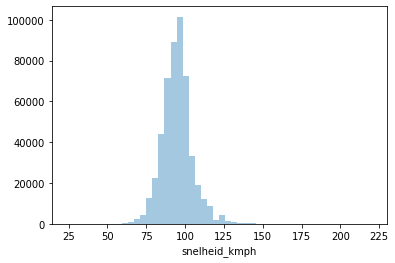

In [5]:
# Lees alle parquetfiles in en schrijf data weg naar dataframes
parquetFilesPaths = getFilePathsinFolderByType(r'C:\Case\Brondata\dataset_03\measurements_v2_2', '.parquet')

n = 0
for filePath in parquetFilesPaths:
    str_index = filePath.find('date=')
    datum_str = filePath[str_index+5:str_index+15]
    print("Bezig met "+datum_str)
    
    if n == 0:
        df = pq.read_table(filePath, columns=['snelheid_kmph', 'meetpunt_id', 'car_type','volgtijd']).to_pandas()  
        
    else:
        pd.concat([df,pq.read_table(filePath, columns=['snelheid_kmph', 'meetpunt_id', 'car_type','volgtijd']).to_pandas()],axis=1)
    
    n += 1

ax = sns.distplot(df['snelheid_kmph'],kde=False)

In [6]:
df.max()

snelheid_kmph     220
meetpunt_id      3761
car_type          Van
volgtijd         3001
dtype: object

In [7]:
def f(row,col_name):
    if row[col_name] in rijstrook1_meetlussen:
        val = 'Rijstrook 1'
    elif row[col_name] in rijstrook2_meetlussen:
        val = 'Rijstrook 2'
    elif row[col_name] in rijstrook3_meetlussen:
        val = 'Rijstrook 3'
    else:
        val = 'Rijstrook onbekend'
    return val

df['Rijstrook'] = df.apply(lambda row: f(row,'meetpunt_id') , axis=1)

In [8]:
def f2(row,col_name):
    if (row[col_name] =='Car') or (row[col_name] =='Motorcycle') or (row[col_name] =='Van'):
        val = 'Car'
    elif (row[col_name] =='Small Truck') or (row[col_name] =='Large Truck'):
        val = 'Truck'
    else:
        val = 'Type onbekend'
    return val

df['Voertuig Type'] = df.apply(lambda row: f2(row,'car_type') , axis=1)

df

,snelheid_kmph,meetpunt_id,car_type,volgtijd,Rijstrook,Voertuig Type
0,93,3751,Car,2891,Rijstrook 2,Car
1,103,3751,Car,3001,Rijstrook 2,Car
2,106,3751,Car,172,Rijstrook 2,Car
3,111,3751,Van,3001,Rijstrook 2,Car
4,99,3751,Car,2051,Rijstrook 2,Car
...,...,...,...,...,...,...
506012,111,3694,Car,3001,Rijstrook 3,Car
506013,96,3694,Car,1481,Rijstrook 3,Car
506014,96,3694,Car,3001,Rijstrook 3,Car
506015,110,3694,Car,3001,Rijstrook 3,Car


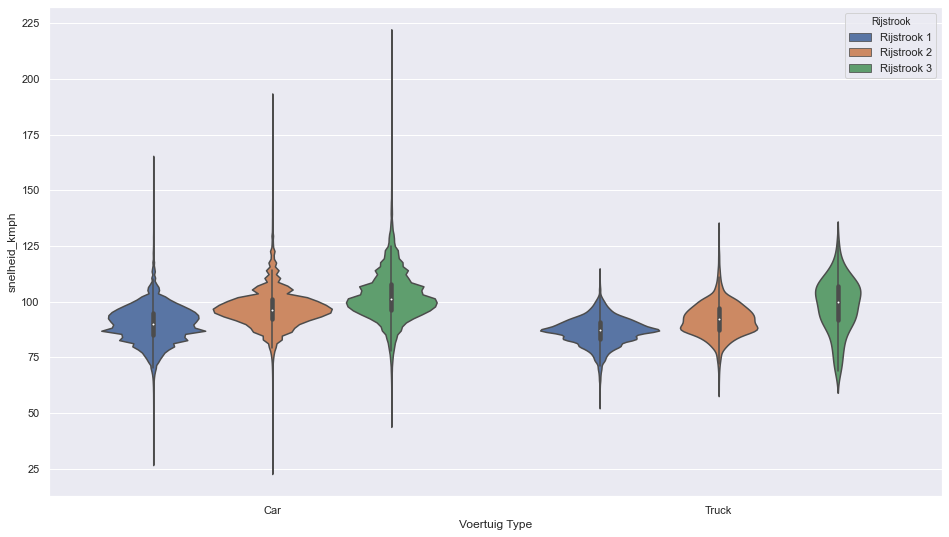

In [9]:
sns.set(rc={'figure.figsize':(16,9)})
# sns.set_style("whitegrid")

ax4 = sns.violinplot(x='Voertuig Type', y="snelheid_kmph", hue='Rijstrook',data=df.sort_values('Rijstrook'))